In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [3]:
cancer_data = pd.read_csv("/Users/Sundipta/Desktop/Cancer_data.csv") #load the dataset 

In [5]:
cancer_data.head(2) #show the first 2 rows from the dataset

,Id,Gene1_dim1,Gene1_dim2,Gene2_dim1,Gene2_dim2,Species
0,1,5.1,3.5,1.4,0.2,Type 1
1,2,4.9,3.0,1.4,0.2,Type 1


In [7]:
cancer_data.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id            150 non-null int64
Gene1_dim1    150 non-null float64
Gene1_dim2    150 non-null float64
Gene2_dim1    150 non-null float64
Gene2_dim2    150 non-null float64
Species       150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


### Clean the data
Which column do you think is unneeded? 

In [8]:
cancer_data.drop('Id',axis=1,inplace=True) #dropping the Id column as it is unecessary, 
#axis=1 specifies that it should be column wise, inplace =1 means the changes should be reflected into the dataframe

## Visualizing the data

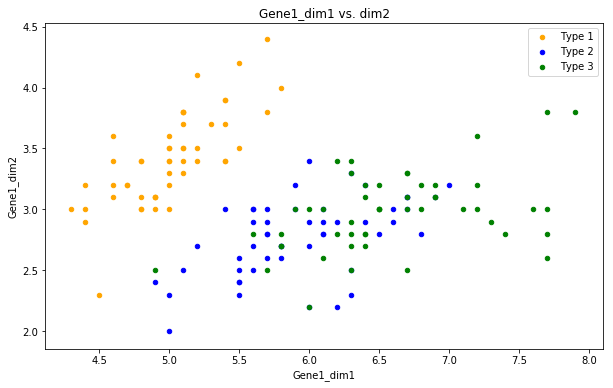

In [12]:
fig = cancer_data[cancer_data.Species=='Type 1'].plot(kind='scatter',x='Gene1_dim1',y='Gene1_dim2',color='orange', label='Type 1')
cancer_data[cancer_data.Species=='Type 2'].plot(kind='scatter',x='Gene1_dim1',y='Gene1_dim2',color='blue', label='Type 2', ax = fig)
cancer_data[cancer_data.Species=='Type 3'].plot(kind='scatter',x='Gene1_dim1',y='Gene1_dim2',color='green', label='Type 3', ax = fig)
fig.set_xlabel("Gene1_dim1")
fig.set_ylabel("Gene1_dim2")
fig.set_title("Gene1_dim1 vs. dim2")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

Change the color of the type 1 data

The above graph looks at the first gene. Now let's look at the second gene. 

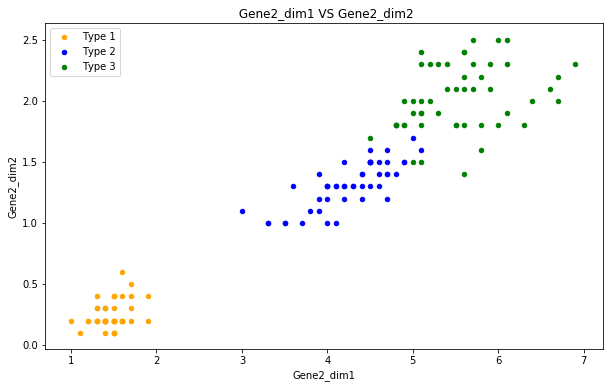

In [13]:
fig = cancer_data[cancer_data.Species=='Type 1'].plot.scatter(x='Gene2_dim1',y='Gene2_dim2',color='orange', label='Type 1')
cancer_data[cancer_data.Species=='Type 2'].plot.scatter(x='Gene2_dim1',y='Gene2_dim2',color='blue', label='Type 2',ax=fig)
cancer_data[cancer_data.Species=='Type 3'].plot.scatter(x='Gene2_dim1',y='Gene2_dim2',color='green', label='Type 3', ax=fig)
fig.set_xlabel("Gene2_dim1")
fig.set_ylabel("Gene2_dim2")
fig.set_title(" Gene2_dim1 VS Gene2_dim2")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

Which clusters look easier to separate? Gene 1 or gene 2?

This may give us an indication of which gene will give us better predictions.

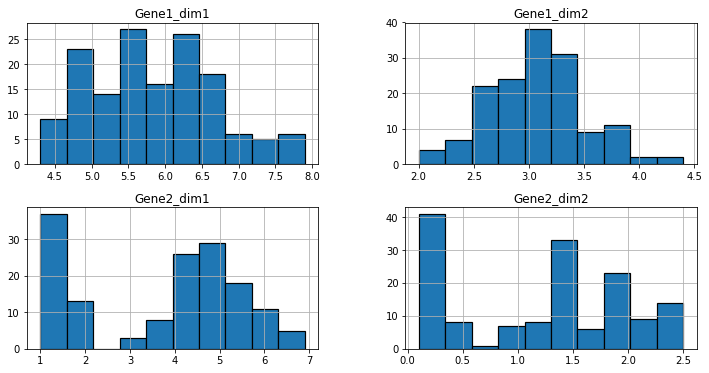

In [16]:
#Now let's look at how the dimensions are distributed.
cancer_data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

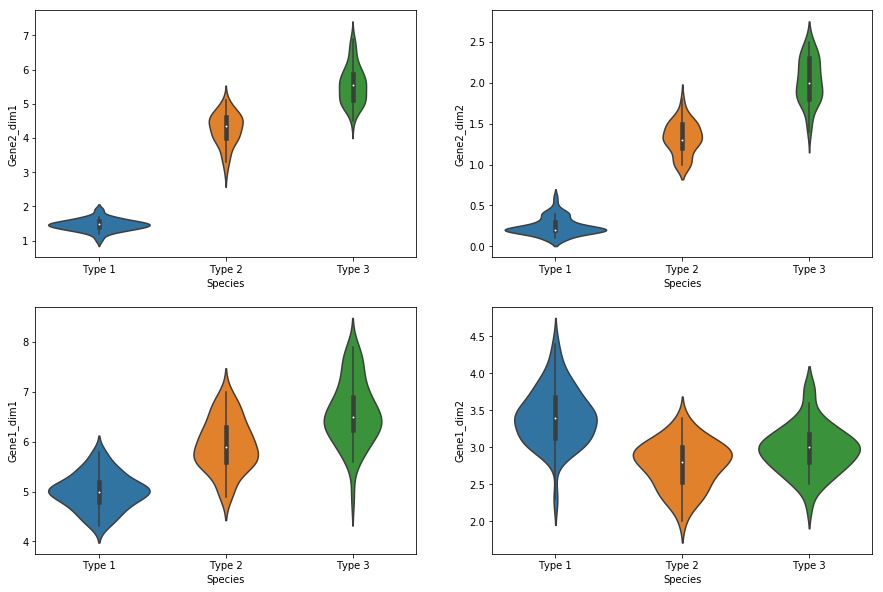

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='Gene2_dim1',data=cancer_data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='Gene2_dim2',data=cancer_data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='Gene1_dim1',data=cancer_data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='Gene1_dim2',data=cancer_data)
plt.show()

The violinplot shows density of the dimensions in the different types. The thinner part denotes that there is less density whereas the fatter part conveys higher density

### Now the given problem is a classification problem.. Thus we will be using the classification algorithms to build a model.

Classification: 
samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

Regression: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.
Before we start, we need to clear some ML notations.

attributes-->An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the two genes and their different dimensions. It is also known as Features.

Target variable, in the machine learning context is the variable that is or should be the output. Here the target variables are the 3 tumor types.

In [20]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

/Users/Sundipta/venv3/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
cancer_data.shape #get the shape of the dataset

(150, 5)

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

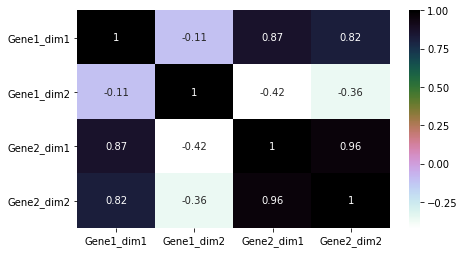

In [24]:
plt.figure(figsize=(7,4)) 
sns.heatmap(cancer_data.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

Observation--->
The gene 1 dimensions are not correlated and the gene 2 dimensions are highly correlated
We will use all the features for training the algorithm and check the accuracy.
Then we will use 1 gene1 Feature and 1 gene2 Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

### Steps To Be followed When Applying an Algorithm

1) Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.

2)Select any algorithm based on the problem (classification or regression) whatever you feel may be good.

3)Then pass the training dataset to the algorithm to train it. We use the .fit() method

4)Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.

5)We then check the accuracy by passing the predicted outcome and the actual output to the model.

### Splitting The Data into Training And Testing Dataset¶

In [25]:
train, test = train_test_split(cancer_data, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [26]:
train_X = train[['Gene1_dim1','Gene1_dim2','Gene2_dim1','Gene2_dim2']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['Gene1_dim1','Gene1_dim2','Gene2_dim1','Gene2_dim2']] # taking test data features
test_y =test.Species   #output value of test data

Lets check the Train and Test Dataset

In [27]:
train_X.head(2)

,Gene1_dim1,Gene1_dim2,Gene2_dim1,Gene2_dim2
29,4.7,3.2,1.6,0.2
24,4.8,3.4,1.9,0.2


In [28]:
test_X.head(2)

,Gene1_dim1,Gene1_dim2,Gene2_dim1,Gene2_dim2
124,6.7,3.3,5.7,2.1
18,5.7,3.8,1.7,0.3


In [29]:
train_y.head()

29    Type 1
24    Type 1
9     Type 1
49    Type 1
0     Type 1
Name: Species, dtype: object

### Algorithm 1: Support Vector Machine (SVM)

In [31]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

('The accuracy of the SVM is:', 0.9555555555555556)


SVM is giving very good accuracy . We will continue to check the accuracy for different models.

Now we will follow the same steps as above for training various machine learning algorithms.

### Algorithm 2: Logistic Regression


In [32]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

('The accuracy of the Logistic Regression is', 0.93333333333333335)


### Algorithm 3: Decision Tree

In [33]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

('The accuracy of the Decision Tree is', 0.93333333333333335)


### Algorithm 4: K-Nearest Neighbors

In [34]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

('The accuracy of the KNN is', 0.93333333333333335)


Let's check the accuracy for various values of n for K-Nearest nerighbours

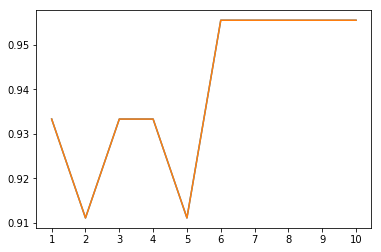

In [36]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()

Above is the graph showing the accuracy for the KNN models using different values of n.

### In the above model, we used all the features. Now we will use Gene 1 and Gene 2 features separately.

#### Create the training data

In [37]:
gene_1=cancer_data[['Gene1_dim1','Gene1_dim2','Species']]
gene_2=cancer_data[['Gene2_dim1','Gene2_dim2','Species']]

In [38]:
train_p,test_p=train_test_split(gene_1,test_size=0.3,random_state=0)  #Gene 1
train_x_p=train_p[['Gene1_dim1','Gene1_dim2']]
train_y_p=train_p.Species
test_x_p=test_p[['Gene1_dim1','Gene1_dim2']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(gene_2,test_size=0.3,random_state=0)  #Gene 2
train_x_s=train_s[['Gene2_dim1','Gene2_dim2']]
train_y_s=train_s.Species
test_x_s=test_s[['Gene2_dim1','Gene2_dim2']]
test_y_s=test_s.Species

### SVM

In [39]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Gene 1 is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Gene 2 is:',metrics.accuracy_score(prediction,test_y_s))

('The accuracy of the SVM using Gene 1 is:', 0.80000000000000004)
('The accuracy of the SVM using Gene 2 is:', 0.97777777777777775)


### Logistic Regression

In [40]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Gene 1 is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Gene 2 is:',metrics.accuracy_score(prediction,test_y_s))

('The accuracy of the Logistic Regression using Gene 1 is:', 0.64444444444444449)
('The accuracy of the Logistic Regression using Gene 2 is:', 0.68888888888888888)


### Decision Tree

In [41]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Gene 1 is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Gene 2 is:',metrics.accuracy_score(prediction,test_y_s))

('The accuracy of the Decision Tree using Gene 1 is:', 0.64444444444444449)
('The accuracy of the Decision Tree using Gene 2 is:', 0.9555555555555556)


### K-Nearest Neighbors

In [42]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Gene 1 is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Gene 2 is:',metrics.accuracy_score(prediction,test_y_s))

('The accuracy of the KNN using Gene 1 is:', 0.73333333333333328)
('The accuracy of the KNN using Gene 2 is:', 0.97777777777777775)


### 1) Which gene gives us the more accurate model?

### 2) Is this what you expected from the heat map?